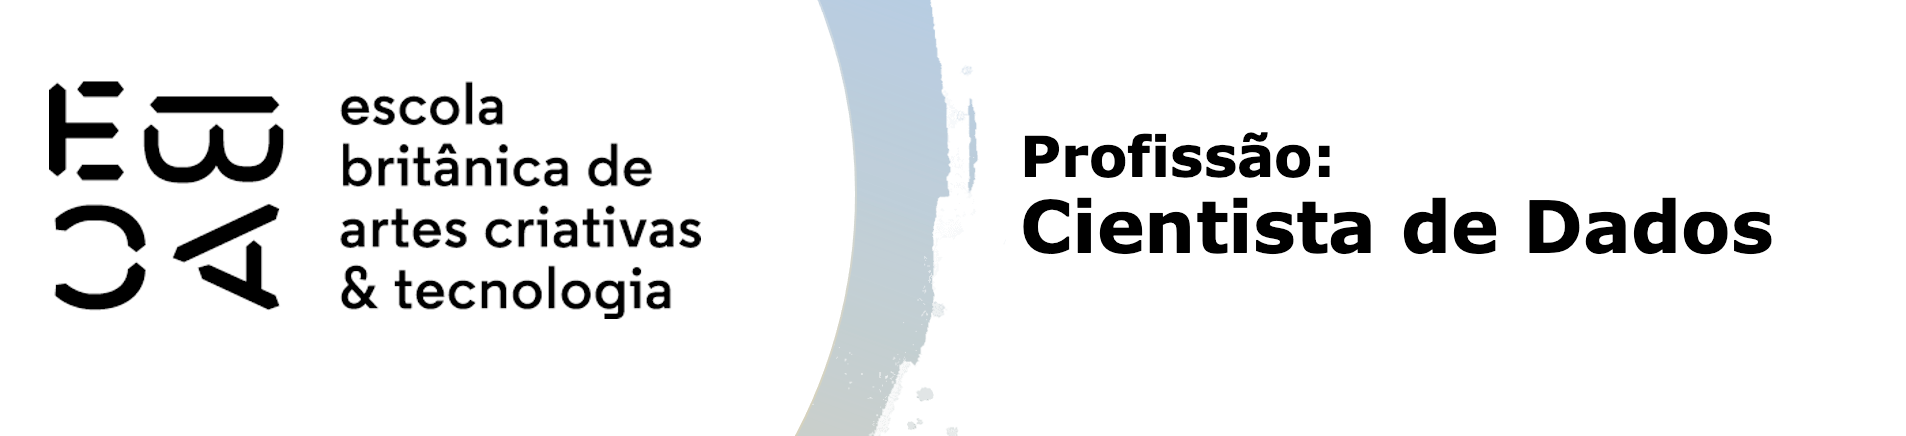

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
df = pd.read_csv('C:/Users/Cristina/Desktop/cursoCienciaDadosEbac/CienciaDados/modulo_29/M29E01/online_shoppers_intention.csv')


In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [5]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df.select_dtypes('object').describe().transpose()     # seleciona as colunas que têm o tipo de dados = Object = texto
                                                      # describe() exibe estatíticas descritivas
                                                      # transpose() inverte linhas e colunas para exibição dos dados

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [7]:
# dados faltantes
df.isna().any()  

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

# Método do Cotovelo

In [8]:
X = df.iloc[:, :6]  # Seleciona as 6 primeiras colunas


In [9]:
X = X.dropna()  # Remove linhas com valores nulos


In [10]:
scaler = StandardScaler()  #padronizar dados com média 0 e desvio padrão 1
X_pad_idx = scaler.fit_transform(X)


In [11]:
SQD = []
K = range(1, 15)

for k in tqdm(K):
    km = KMeans(n_clusters=k, n_init=10, algorithm="lloyd")
    km = km.fit(X_pad_idx)
    SQD.append(km.inertia_)


  0%|          | 0/14 [00:00<?, ?it/s]C:\Users\Cristina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Cristina\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Cristina\anaconda3\Lib\subprocess.py", line 1

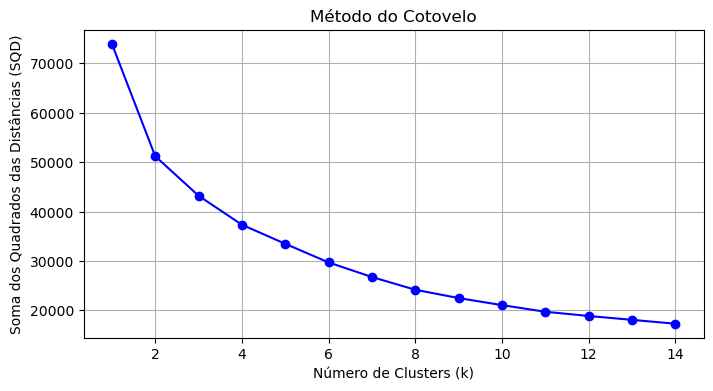

In [12]:
# plota cotevelo

plt.figure(figsize=(8, 4))
plt.plot(K, SQD, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias (SQD)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()


# Método da Silueta

In [13]:
# Lista para armazenar os valores de silhueta
siluetas = []
max_clusters = 10

# Cópia para armazenar os resultados dos clusters
X_clusters = pd.DataFrame(X_pad_idx, columns=X.columns)

# Loop pelos valores de k (número de clusters)
for n_clusters in tqdm(range(2, max_clusters + 1)):
    km = KMeans(n_clusters=n_clusters, n_init=10, algorithm="lloyd", random_state=42)
    km.fit(X_pad_idx)

    # Calcular o índice de silhueta
    siluetas.append(silhouette_score(X_pad_idx, km.labels_))

    # Criar nomes de grupos
    nomes_grupos = [f'grupo_{g}' for g in range(n_clusters)]

    # Adicionar os rótulos dos clusters ao DataFrame
    X_clusters[f'grupos_{n_clusters}'] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)

100%|██████████| 9/9 [00:26<00:00,  2.92s/it]


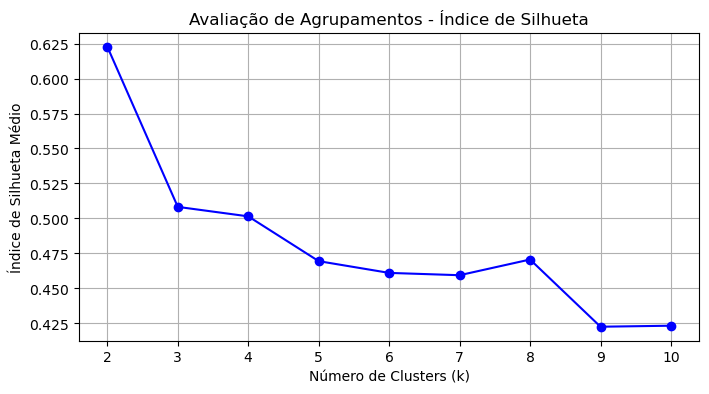

In [14]:


plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), siluetas, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhueta Médio')
plt.title('Avaliação de Agrupamentos - Índice de Silhueta')
plt.grid(True)
plt.show()


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [15]:
X_pad_6 = df.iloc[:, :6]  # Pegando as 6 primeiras colunas


In [16]:
X_pad_6.columns  # Para listar todas as colunas


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
      dtype='object')

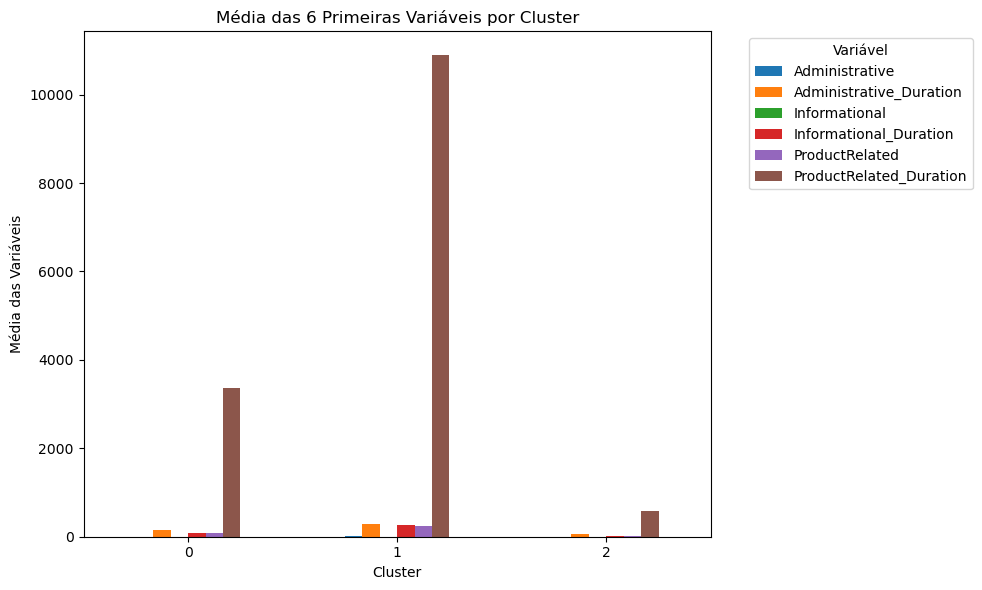

In [17]:
# Selecionar as 6 primeiras variáveis
X_pad_6 = df.iloc[:, :6]

# Aplicar KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['grupos_3'] = kmeans.fit_predict(X_pad_6)

# Calcular a média das 6 variáveis para cada cluster
media_por_cluster = df.groupby('grupos_3')[X_pad_6.columns].mean()

# Plotar gráfico com clusters no eixo X e variáveis como barras coloridas
ax = media_por_cluster.plot(kind='bar', figsize=(10, 6))

# Ajustes visuais
plt.title('Média das 6 Primeiras Variáveis por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média das Variáveis')
plt.legend(title='Variável', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [30]:
pd.crosstab(df['ProductRelated_Duration'], df['grupos_3'])



grupos_3,0,1,2
ProductRelated_Duration,,,
0.000000,0,0,755
0.500000,0,0,1
1.000000,0,0,2
2.333333,0,0,1
2.666667,0,0,1
...,...,...,...
24844.156200,0,1,0
27009.859430,0,1,0
29970.465970,0,1,0


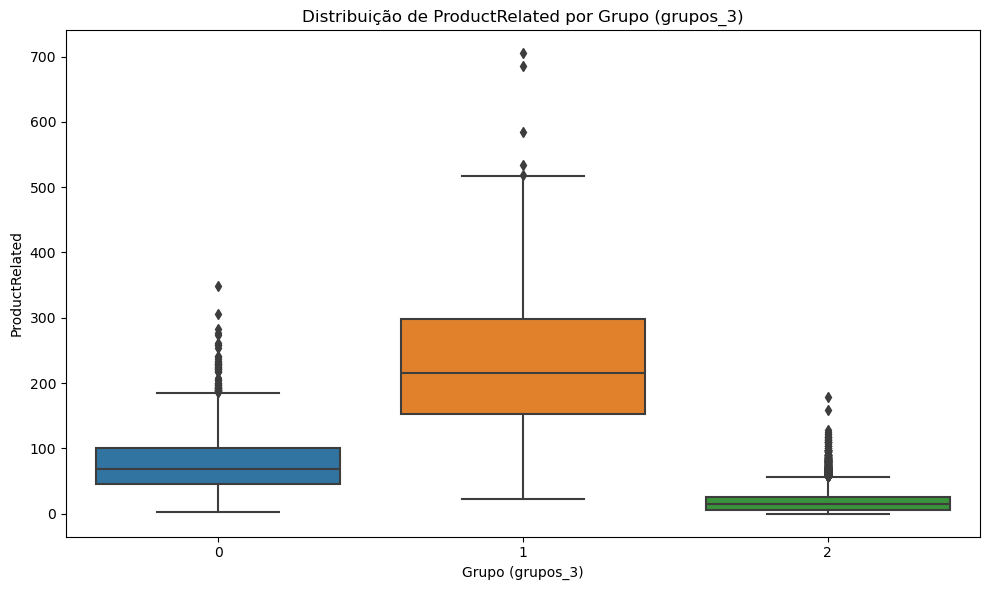

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='grupos_3', y='ProductRelated', data=df)
plt.title('Distribuição de ProductRelated por Grupo (grupos_3)')
plt.xlabel('Grupo (grupos_3)')
plt.ylabel('ProductRelated')
plt.tight_layout()
plt.show()

C:\Users\Cristina\AppData\Local\Temp\ipykernel_10452\3844284862.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pad['grupos_3'] = kmeans.fit_predict(X_pad_selecionadas)
C:\Users\Cristina\AppData\Local\Temp\ipykernel_10452\3844284862.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'Cluster {i}' for i in range(3)], rotation=0)  # Renomeia os clusters para exibir 'Cluster 0', 'Cluster 1', etc.


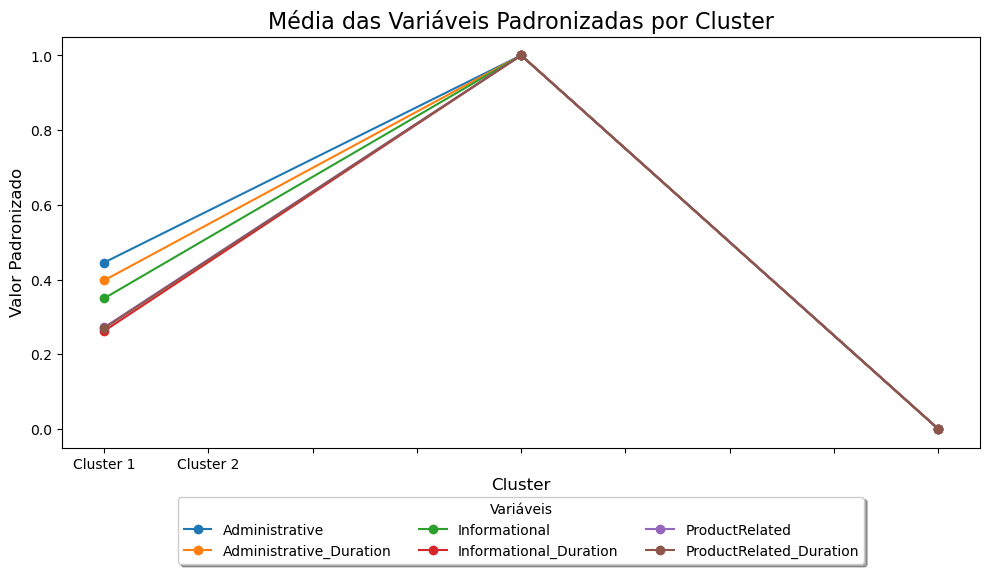

In [36]:
# Função de padronização
padroniza = lambda x: (x - x.min()) / (x.max() - x.min())

# Selecionando as 6 variáveis diretamente de X_pad
variaveis_selecionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Acessando as variáveis de interesse do DataFrame X_pad
X_pad_selecionadas = X_pad[variaveis_selecionadas]

# Aplicar KMeans com 3 clusters (considerando que você já tem a coluna 'grupos_3' no DataFrame)
kmeans = KMeans(n_clusters=3, random_state=42)
X_pad['grupos_3'] = kmeans.fit_predict(X_pad_selecionadas)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar por 'grupos_3' e calcular a média
# Aplicar a padronização e plotar
X_pad.groupby(['grupos_3'])[variaveis_selecionadas].mean().apply(padroniza).plot(ax=ax, marker='o')

# Ajustes de visualização
ax.set_title('Média das Variáveis Padronizadas por Cluster', fontsize=16)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Valor Padronizado', fontsize=12)
ax.set_xticklabels([f'Cluster {i}' for i in range(3)], rotation=0)  # Renomeia os clusters para exibir 'Cluster 0', 'Cluster 1', etc.
ax.legend(variaveis_selecionadas, title='Variáveis', loc='lower center', bbox_to_anchor=(0.5, -0.3),
          ncol=3, fancybox=True, shadow=True)

# Personalização de cores
ax.set_prop_cycle(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Ajustar o layout
plt.tight_layout()
plt.show()

C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

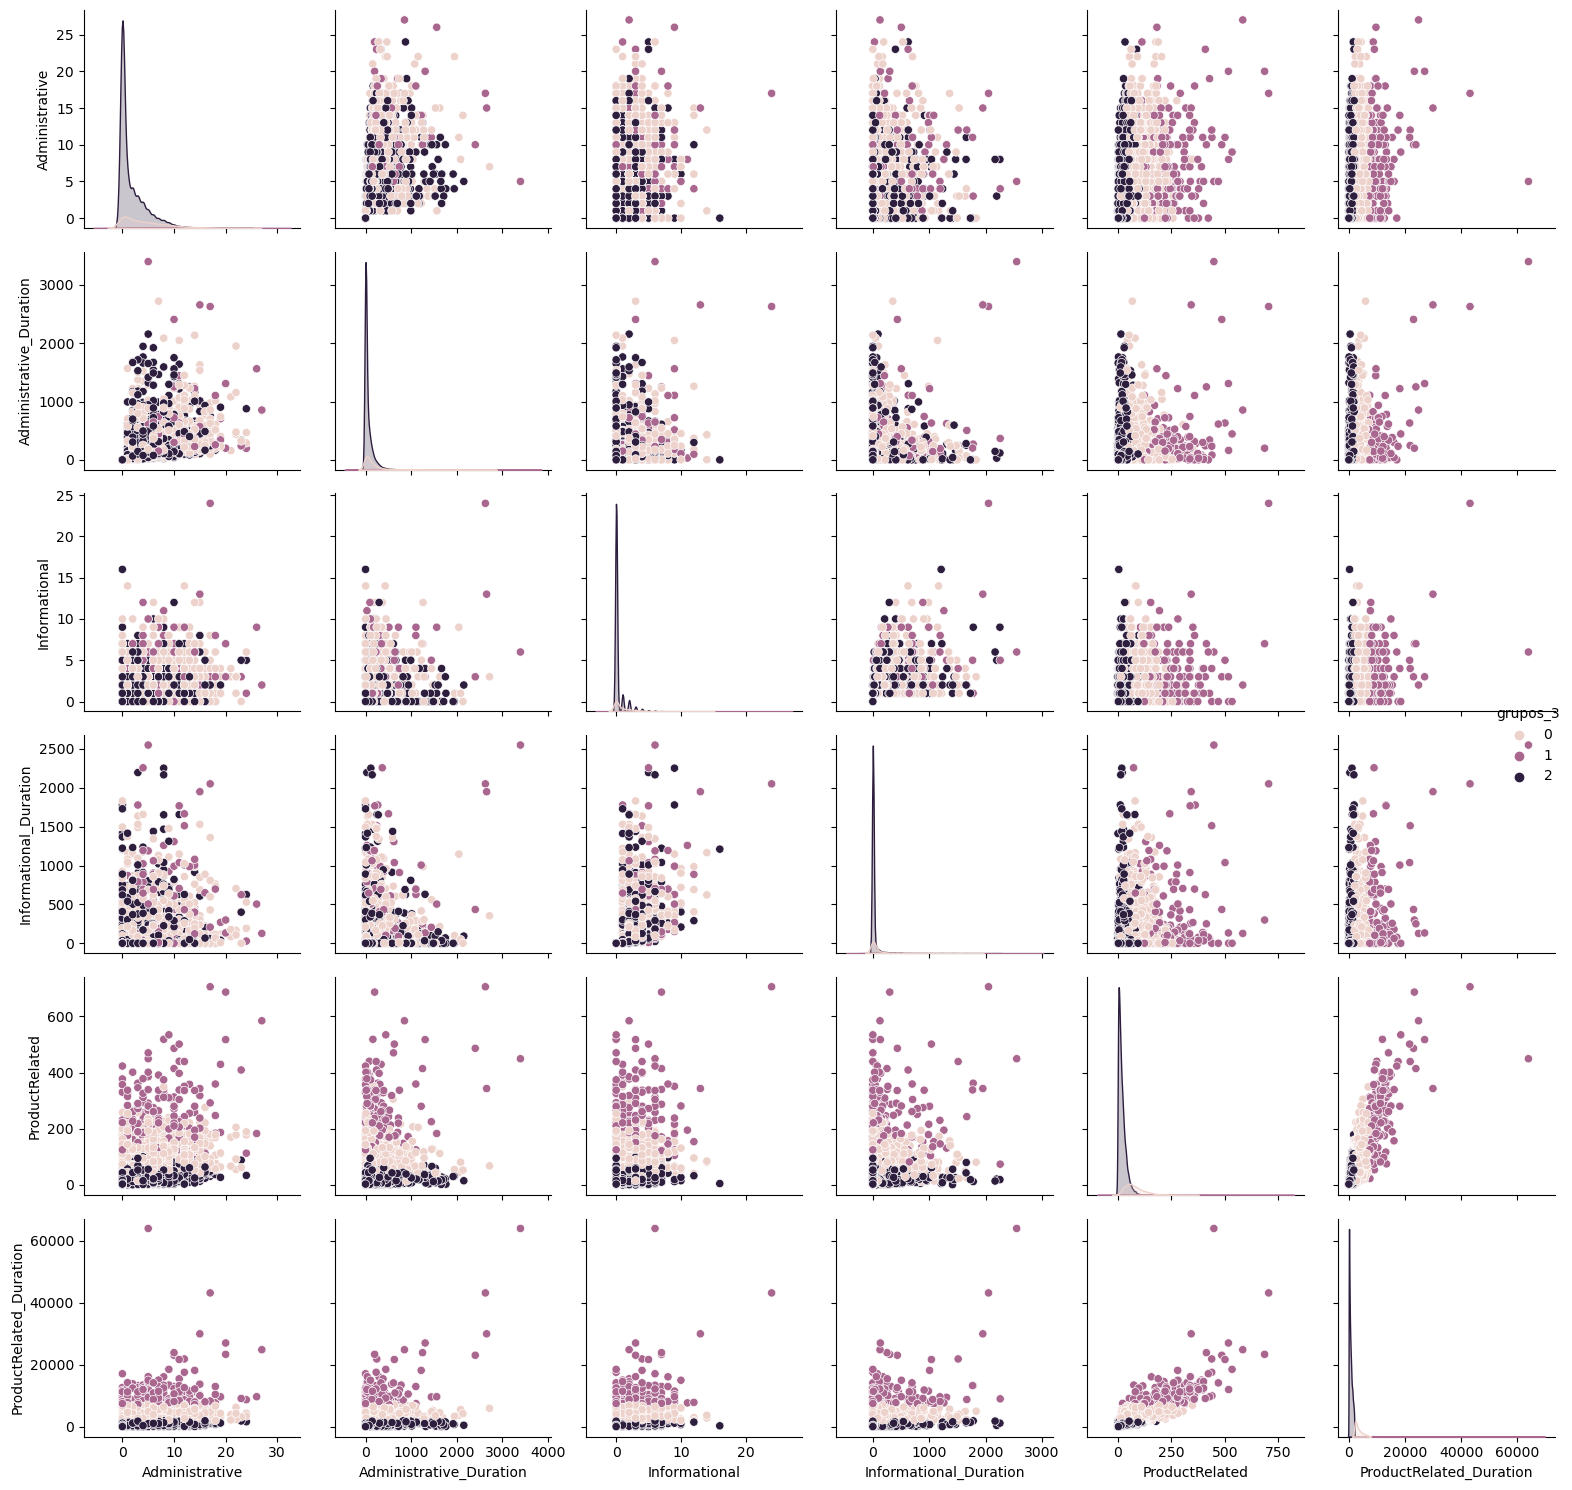

In [38]:
# Definir o número de clusters e a variável de grupo
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)

# Verificar se a coluna de grupos existe no DataFrame
if var_grupo not in X_pad.columns:
    raise ValueError(f"A coluna {var_grupo} não existe em X_pad.")

# Definir as variáveis de interesse diretamente
variaveis_selecionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Acessando as variáveis de interesse do DataFrame X_pad
X_pad_selecionadas = X_pad[variaveis_selecionadas]

# Gerar o gráfico pairplot usando as variáveis selecionadas + a coluna de grupos
sns.pairplot(X_pad_selecionadas.join(X_pad[[var_grupo]]), hue=var_grupo)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [41]:
# Definir as 6 variáveis selecionadas
variaveis_selecionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Seleção das colunas com as variáveis escolhidas
X_pad_idx = X_pad[variaveis_selecionadas]

# Substituir valores infinitos por NaN
X_pad_idx = X_pad_idx.replace([float('inf'), -float('inf')], pd.NA)

# Remover linhas com NaN (caso existam)
X_pad_idx_clean = X_pad_idx.dropna()

# PCA com 2 componentes principais
pca = PCA(n_components=2)

# Aplicar o PCA aos dados limpos
componentes = pca.fit_transform(X_pad_idx_clean)

# Exibir os componentes principais
print("Componentes Principais:\n", componentes)

# Opcional: Exibir a explicação da variância
print("\nExplicação da variância por componente principal:", pca.explained_variance_ratio_)

Componentes Principais:
 [[-1197.63279839   -40.79405858]
 [-1133.68171112   -43.26067544]
 [-1197.63279839   -40.79405858]
 ...
 [-1013.48121717   -47.90911635]
 [ -849.24315168    18.27219229]
 [-1176.36569961   -41.62398232]]

Explicação da variância por componente principal: [0.98783366 0.00754446]


C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Cristina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


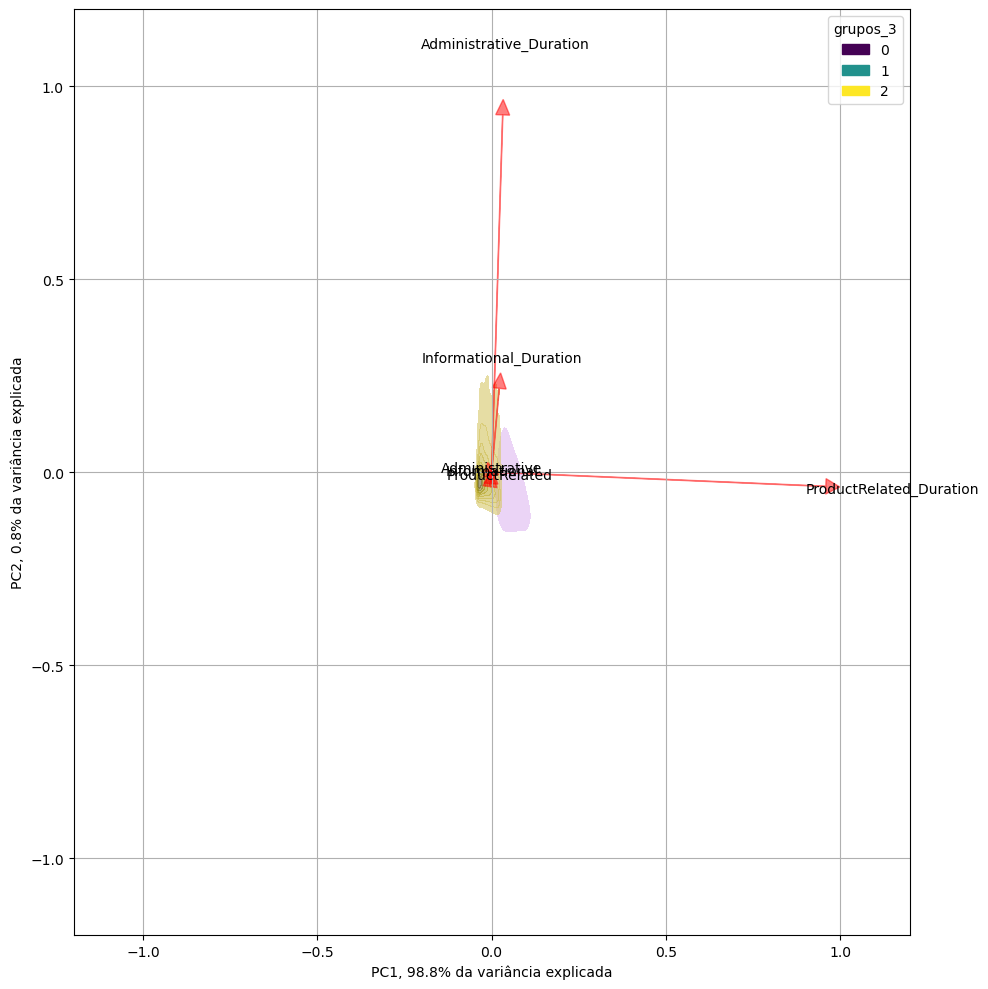

In [43]:
def biplot(score, coeff, y, labels=None):
    xs = score[:, 0]  # Pontuação no primeiro componente
    ys = score[:, 1]  # Pontuação no segundo componente
    n = coeff.shape[0]  # Número de variáveis
    scalex = 2 / (xs.max() - xs.min())  # Escala para os dados do eixo X
    scaley = 2 / (ys.max() - ys.min())  # Escala para os dados do eixo Y

    # Criar o gráfico
    fig, ax = plt.subplots(figsize=(10, 10))

    # Gráfico de densidade usando kdeplot do Seaborn
    sns.kdeplot(x=xs * scalex, y=ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')

    # Adicionar vetores para as variáveis (componentes principais)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        
        # Adicionar texto indicando a variável
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i + 1}", color='k', ha='center', va='center')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='k', ha='center', va='center')

    ax.set_xlim(-1.2, 1.2)  # Definir limite dos eixos X
    ax.set_ylim(-1.2, 1.2)  # Definir limite dos eixos Y
    ax.set_xlabel(f"PC1, {pca.explained_variance_ratio_[0]:.1%} da variância explicada")
    ax.set_ylabel(f"PC2, {pca.explained_variance_ratio_[1]:.1%} da variância explicada")
    ax.grid()

    plt.tight_layout()
    plt.show()

# Definir as 6 variáveis selecionadas
variaveis_selecionadas = ['Administrative', 'Administrative_Duration', 'Informational',
                           'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Seleção das variáveis do X_pad
X_pad_idx = X_pad[variaveis_selecionadas]

# Substituir valores infinitos por NaN
X_pad_idx = X_pad_idx.replace([float('inf'), -float('inf')], pd.NA)

# Remover linhas com NaN
X_pad_idx_clean = X_pad_idx.dropna()

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)

# Transformar os dados
componentes = pca.fit_transform(X_pad_idx_clean)

# Obter os coeficientes (componentes principais) que descrevem a direção das variáveis
coeff = pca.components_.T

# Verificar a existência da coluna de grupos antes de passar para o gráfico
var_grupo = 'grupos_3'  # Garantir que estamos usando a coluna de grupos correta

# Verificar se a coluna de grupos existe no DataFrame
if var_grupo not in X_pad.columns:
    raise ValueError(f"A coluna {var_grupo} não existe em X_pad.")

# Criar o gráfico biplot
biplot(componentes, coeff, X_pad['grupos_3'], labels=variaveis_selecionadas)

In [44]:
# Calcular a média de BounceRates e proporção de compras (Revenue) por grupo
avaliacao = df.groupby('grupos_3')[['BounceRates', 'Revenue']].agg({
    'BounceRates': 'mean',
    'Revenue': 'mean'  # como Revenue é binário, a média representa a proporção de compras
}).rename(columns={'Revenue': 'Proporcao_Compra'})

# Visualizar
print(avaliacao)


          BounceRates  Proporcao_Compra
grupos_3                               
0            0.007134          0.251012
1            0.005940          0.338164
2            0.025455          0.132256


O grupo 1 é o mais propenso à compra, com a menor taxa de rejeição (Bounce Rate) e a maior taxa de conversão (Revenue). Já o grupo 2 é o menos engajado, com maior Bounce Rate e menor proporção de compras. O grupo 0 fica em uma posição intermediária.